<a href="https://colab.research.google.com/github/zkaganz/Credit-Risk/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/deneme/german_credit_data.csv")
data.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [ ]:
data.drop("Unnamed: 0" , axis=1,inplace=True)

In [ ]:
data.fillna(method='ffill', inplace=True)

In [ ]:
data.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,little,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,little,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [ ]:
data["Risk"] = "Good "
data.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,little,1736,12,furniture/equipment,Good
996,40,male,3,own,little,little,3857,30,car,Good
997,38,male,2,own,little,little,804,12,radio/TV,Good
998,23,male,2,free,little,little,1845,45,radio/TV,Good
999,27,male,2,own,moderate,moderate,4576,45,car,Good


In [ ]:
data.loc[(data['Age'] < 17) | (data['Age'] > 60), 'Risk'] = 'Bad'
data.loc[(data['Age'] >= 60) & ((data['Saving accounts'] == 'little') | (data['Checking account'] == 'little')) & (data['Duration'] > 40), 'Risk'] = 'Bad'
data.loc[(data['Age'] == 60) & ((data['Saving accounts'] == 'little') | (data['Saving accounts'] == 'moderate')) & (data['Duration'] < 5) & (data['Credit amount'] < 900), 'Risk'] = 'Good'
data.loc[(data['Saving accounts'] == 'moderate') & (data['Credit amount'] > 900) & (data['Credit amount'] < 1500) & (data['Duration'] == 12), 'Risk'] = 'Good'
data.loc[(data['Saving accounts'] == 'little') & (data['Credit amount'] > 1200), 'Risk'] = 'Bad'
data.loc[(data['Housing'] == 'own') & (data['Credit amount'] < 5000) & (data['Saving accounts'] != 'little'), 'Risk'] = 'Good'

In [ ]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

In [ ]:
data.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_female',
       'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [ ]:
X = data.drop('Risk', axis=1)
y = data['Risk']

<Axes: xlabel='Risk', ylabel='count'>

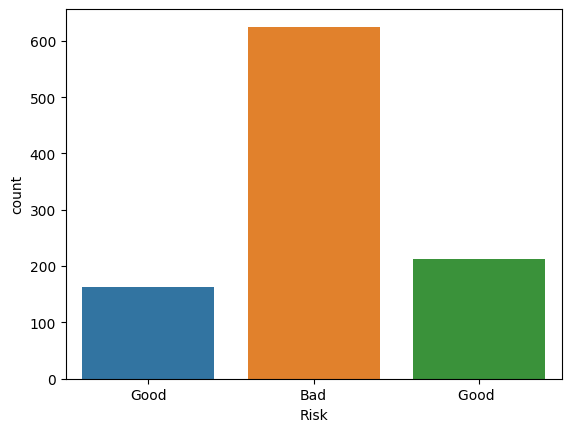

In [ ]:
sns.countplot(x='Risk', data=data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.79      0.92      0.85       130
        Good       0.59      0.47      0.52        34
       Good        0.24      0.14      0.18        36

    accuracy                           0.70       200
   macro avg       0.54      0.51      0.52       200
weighted avg       0.66      0.70      0.67       200

[[120   7   3]
 [  5  16  13]
 [ 27   4   5]]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.705

Confusion Matrix:
 [[120   7   3]
 [  5  16  13]
 [ 27   4   5]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.79      0.92      0.85       130
        Good       0.59      0.47      0.52        34
       Good        0.24      0.14      0.18        36

    accuracy                           0.70       200
   macro avg       0.54      0.51      0.52       200
weighted avg       0.66      0.70      0.67       200

